In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [25]:
image = cv2.imread("/home/angelika/Desktop/8_term/R_D/python_utils/multipysics_crop.jpg",  cv2.IMREAD_GRAYSCALE)

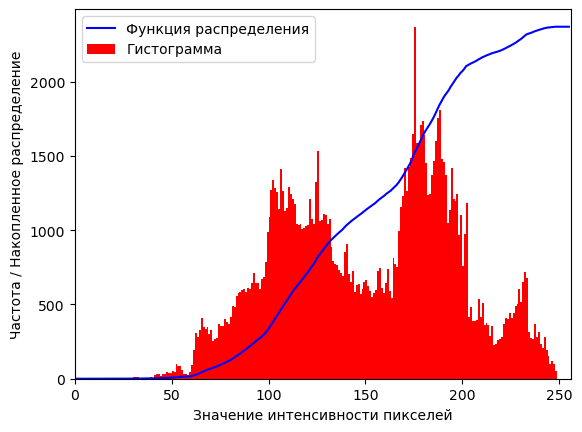

In [26]:
# mean, std = image.mean(), image.std()
# norm_image = ((image - mean) / std * 255).astype
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(image,cv2.MORPH_OPEN,kernel, iterations = 2)
 
hist,bins = np.histogram(opening.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.xlabel("Значение интенсивности пикселей")
plt.ylabel("Частота / Накопленное распределение")
plt.plot(cdf_normalized, color = 'b')
plt.hist(opening.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('Функция распределения','Гистограмма'), loc = 'upper left')
plt.show()

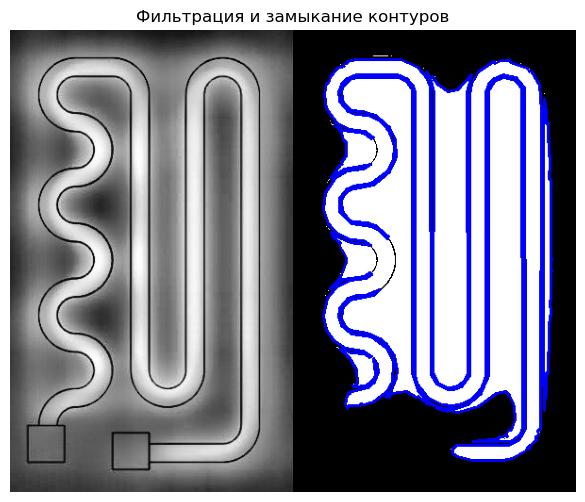

In [27]:
clahe = cv2.createCLAHE(clipLimit=5)
final_img = clahe.apply(image)

# Бинаризация изображения
_, ordinary_img = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)

# Поиск контуров
contours, _ = cv2.findContours(ordinary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Фильтруем контуры по длине (например, > 100 пикселей)
filtered_contours = [cnt for cnt in contours if cv2.arcLength(cnt, closed=False) > 100]

# Замыкаем контуры (если требуется)
closed_contours = []
for cnt in filtered_contours:
    epsilon = 0.0002 * cv2.arcLength(cnt, True)  # Чем больше коэффициент, тем грубее аппроксимация
    approx = cv2.approxPolyDP(cnt, epsilon, True)  # Аппроксимация и замыкание контура
    closed_contours.append(approx)

# Переводим бинарное изображение в 3-канальное BGR
contour_img = cv2.cvtColor(ordinary_img, cv2.COLOR_GRAY2BGR)

# Рисуем отфильтрованные и замкнутые контуры
cv2.drawContours(contour_img, closed_contours, -1, (255, 0, 0), 2)
final_img_bgr = cv2.cvtColor(final_img, cv2.COLOR_GRAY2BGR)

# Объединяем изображения для отображения
res = np.hstack((final_img_bgr, contour_img))

# Визуализация
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.title('Фильтрация и замыкание контуров')
plt.axis('off')
plt.show()

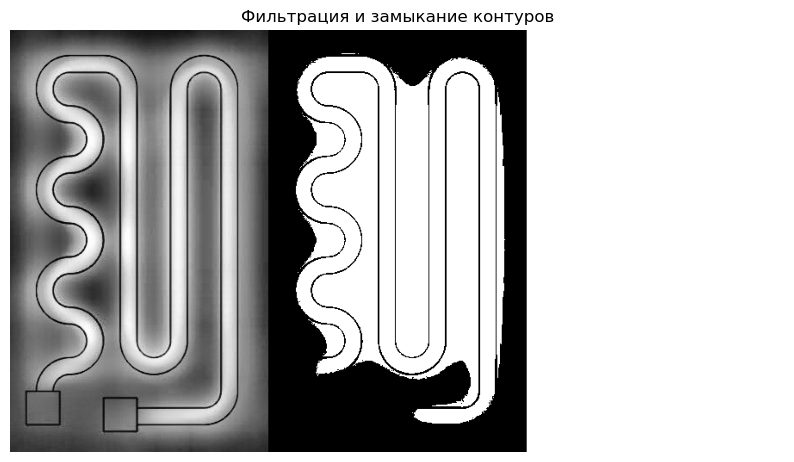

In [18]:
clahe = cv2.createCLAHE(clipLimit=5)
final_img = clahe.apply(image)

# Бинаризация изображения
_, ordinary_img = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)

# Поиск контуров
contours, _ = cv2.findContours(final_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Фильтруем контуры по длине (например, > 100 пикселей)
filtered_contours = [cnt for cnt in contours if cv2.arcLength(cnt, closed=False) > 2000]

# Замыкаем контуры (если требуется)
closed_contours = []
for cnt in filtered_contours:
    epsilon = 0.0002 * cv2.arcLength(cnt, True)  # Чем больше коэффициент, тем грубее аппроксимация
    approx = cv2.approxPolyDP(cnt, epsilon, True)  # Аппроксимация и замыкание контура
    closed_contours.append(approx)

# Переводим бинарное изображение в 3-канальное BGR
contour_img = cv2.cvtColor(ordinary_img, cv2.COLOR_GRAY2BGR)

# Создаём пустое изображение для закраски
filled_image = np.zeros_like(image)

# Закрашиваем найденные контуры (толщина = cv2.FILLED)
cv2.drawContours(filled_image, contours, -1, (255, 0, 0), thickness=cv2.FILLED)


# Рисуем отфильтрованные и замкнутые контуры
cv2.drawContours(contour_img, closed_contours, -1, (255, 0, 0), 2)
final_img_bgr = cv2.cvtColor(final_img, cv2.COLOR_GRAY2BGR)
filled_image_bgr = cv2.cvtColor(filled_image, cv2.COLOR_GRAY2BGR)
# Объединяем изображения для отображения
res = np.hstack((final_img_bgr, contour_img, filled_image_bgr))

# Визуализация
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.title('Фильтрация и замыкание контуров')
plt.axis('off')
plt.show()

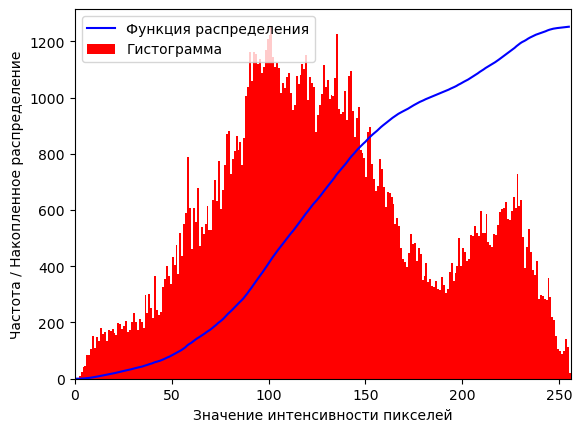

In [23]:
hist,bins = np.histogram(final_img.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.xlabel("Значение интенсивности пикселей")
plt.ylabel("Частота / Накопленное распределение")
plt.plot(cdf_normalized, color = 'b')
plt.hist(final_img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('Функция распределения','Гистограмма'), loc = 'upper left')
plt.show()

In [71]:
cv2.watershed(final_img, contour_img)

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/segmentation.cpp:161: error: (-215:Assertion failed) src.type() == CV_8UC3 && dst.type() == CV_32SC1 in function 'watershed'
